In [21]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

In [22]:
dog_face = cv2.imread("DATA\\dog_face.jpg")

In [23]:
dog = cv2.imread("DATA\\dog.jpg")

In [24]:
dog = cv2.cvtColor(dog , cv2.COLOR_BGR2RGB)
dog_face = cv2.cvtColor(dog_face , cv2.COLOR_RGB2BGR)

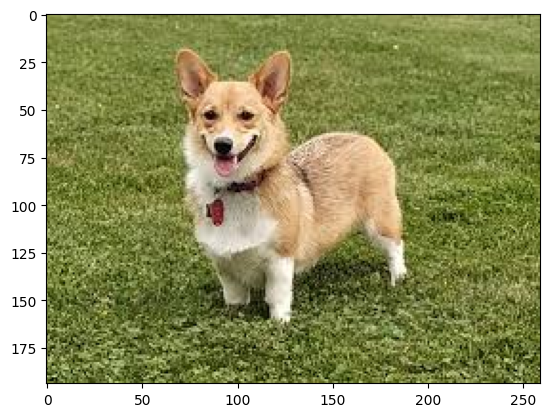

In [25]:
plt.imshow(dog , cmap="gray")

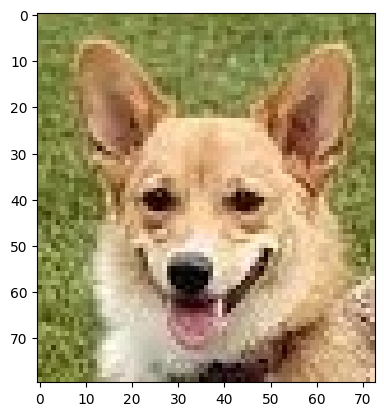

In [26]:
plt.imshow(dog_face , cmap="gray")

In [27]:
dog_face.shape

(80, 73, 3)

In [28]:
height , width , channels = dog_face.shape

In [29]:
my_method = eval("cv2.TM_CCOEFF")
res = cv2.matchTemplate(dog ,dog_face ,my_method)

In [30]:
res

array([[-1170456.9 , -1155716.  , -1158920.  , ..., -1949227.4 ,
        -1949448.9 , -2106429.8 ],
       [-1259244.4 , -1231290.  ,  -979279.44, ..., -2399796.8 ,
        -2391764.  , -2445577.  ],
       [-1273110.9 , -1290310.9 , -1055281.4 , ..., -2625958.5 ,
        -2536096.8 , -2663561.  ],
       ...,
       [-1780087.8 , -1739287.6 , -1635748.1 , ..., -1822046.8 ,
        -1158275.4 , -1147451.  ],
       [-1544650.5 , -1561058.2 , -1666098.5 , ..., -1794615.  ,
        -1353527.2 ,  -973642.1 ],
       [-1418333.6 , -1528298.5 , -1566353.8 , ..., -1492081.8 ,
        -1251946.5 ,  -859622.44]], dtype=float32)

In [31]:
cv2.minMaxLoc(res)

(-17157582.0, 42611236.0, (117, 95), (60, 13))

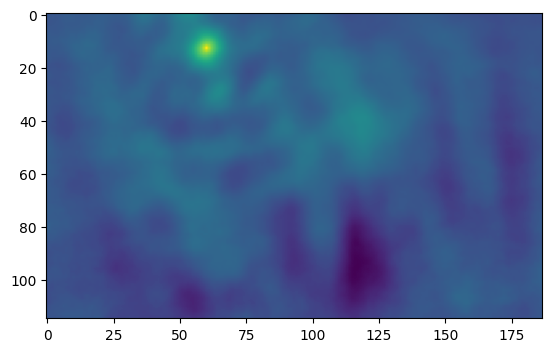

In [11]:
plt.imshow(res)

In [12]:
dog = cv2.imread("DATA\\dog.jpg")
dog_face = cv2.imread("DATA\\dog_face.jpg")
dog = cv2.cvtColor(dog , cv2.COLOR_BGR2RGB)
dog_face = cv2.cvtColor(dog_face , cv2.COLOR_RGB2BGR)


In [13]:
methods = ["cv2.TM_CCOEFF","cv2.TM_CCOEFF_NORMED" , "cv2.TM_CCORR","cv2.TM_CCORR_NORMED","cv2.TM_SQDIFF","cv2.TM_SQDIFF_NORMED"]

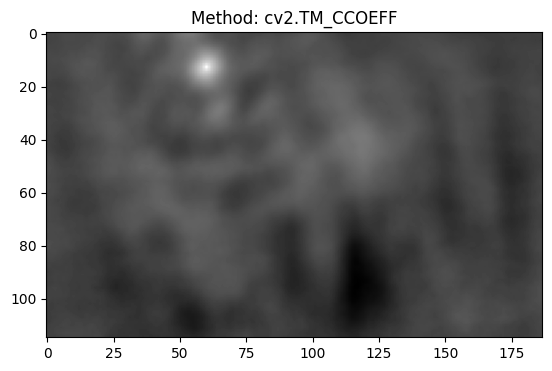

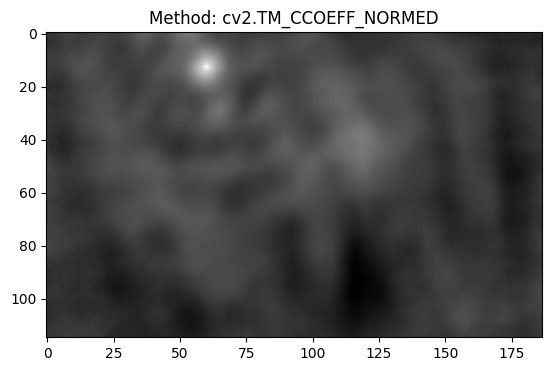

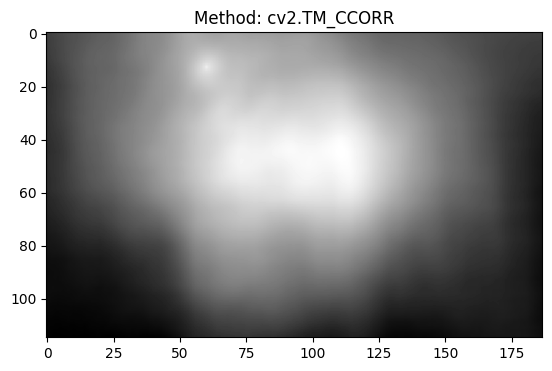

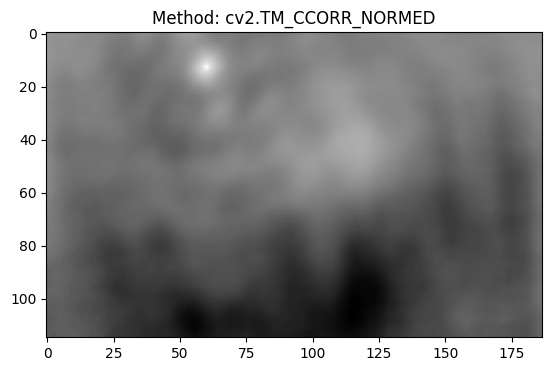

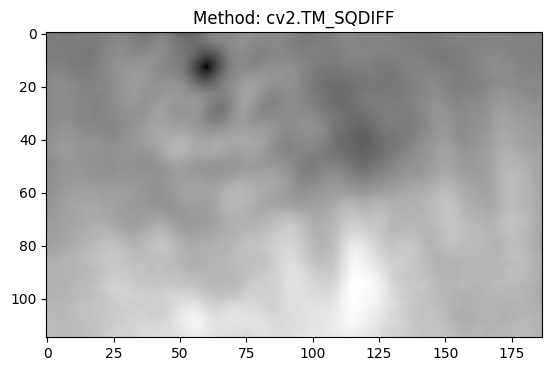

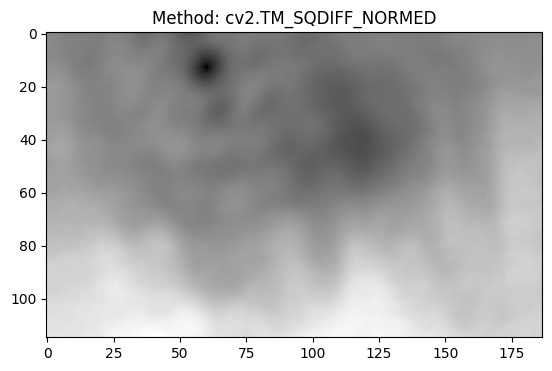

In [15]:
for m in methods:
    dog_copy = dog.copy()
    method = eval(m)

    res = cv2.matchTemplate(dog_copy , dog_face , method)

    plt.imshow(res, cmap='gray')  # veya başka uygun bir colormap
    plt.title(f"Method: {m}")     # Bu, hangi yöntemi kullandığını gösterir
    plt.show()

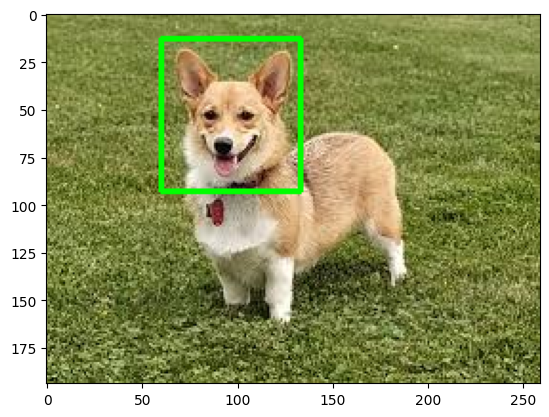

In [20]:
for m in methods:
    dog_copy = dog.copy()
    method = eval(m)
    res = cv2.matchTemplate(dog_copy , dog_face , method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    # Şablon boyutu:
    h, w = dog_face.shape[:2]
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(dog_copy, top_left, bottom_right, (0, 255, 0), 2)
    plt.imshow(dog_copy)
